In [26]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
# Loading the Dataset

crop_data= pd.read_csv('Crop_Recommendation.csv')

In [4]:
crop_data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [5]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop_data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
crop_data.shape

(2200, 8)

Data Visualization

In [29]:
print(crop_data.columns)

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')


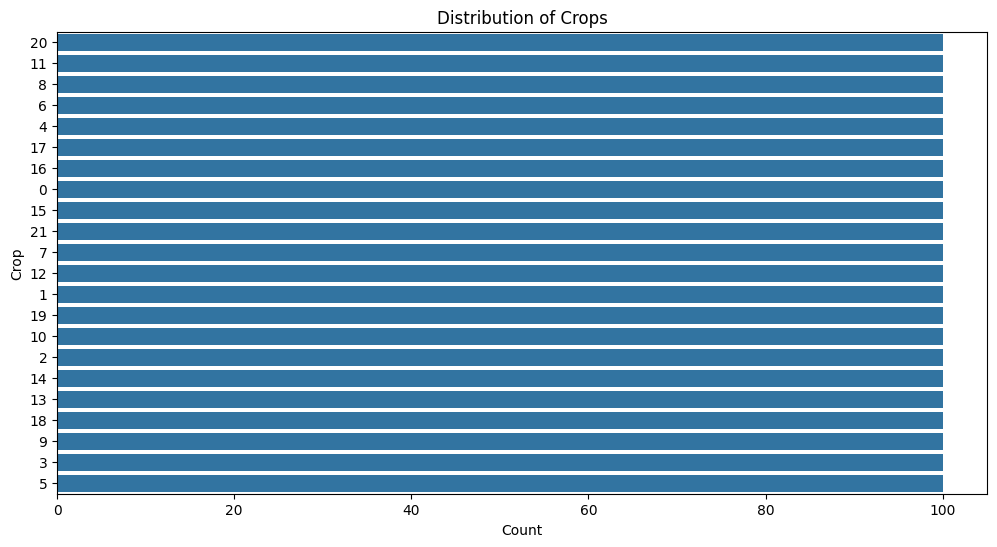

In [30]:
# Distribution of Crops

plt.figure(figsize=(12, 6))
sns.countplot(y='Crop', data=crop_data, order=crop_data['Crop'].value_counts().index)
plt.title('Distribution of Crops')
plt.xlabel('Count')
plt.ylabel('Crop')
plt.show()

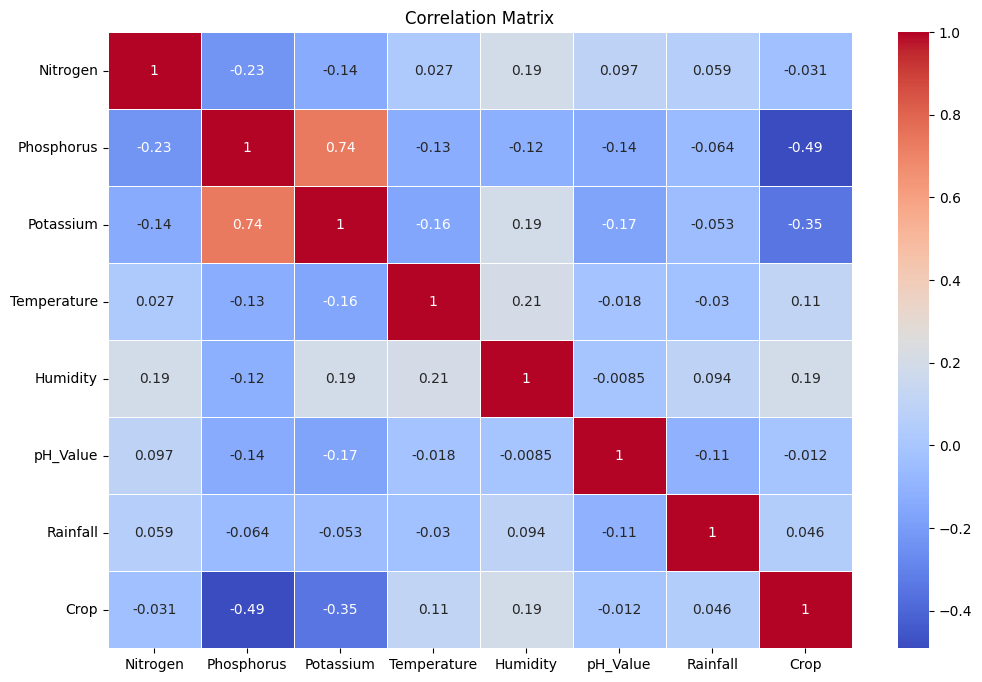

In [34]:
# Correlation Matrix

plt.figure(figsize=(12, 8))
correlation_matrix = crop_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

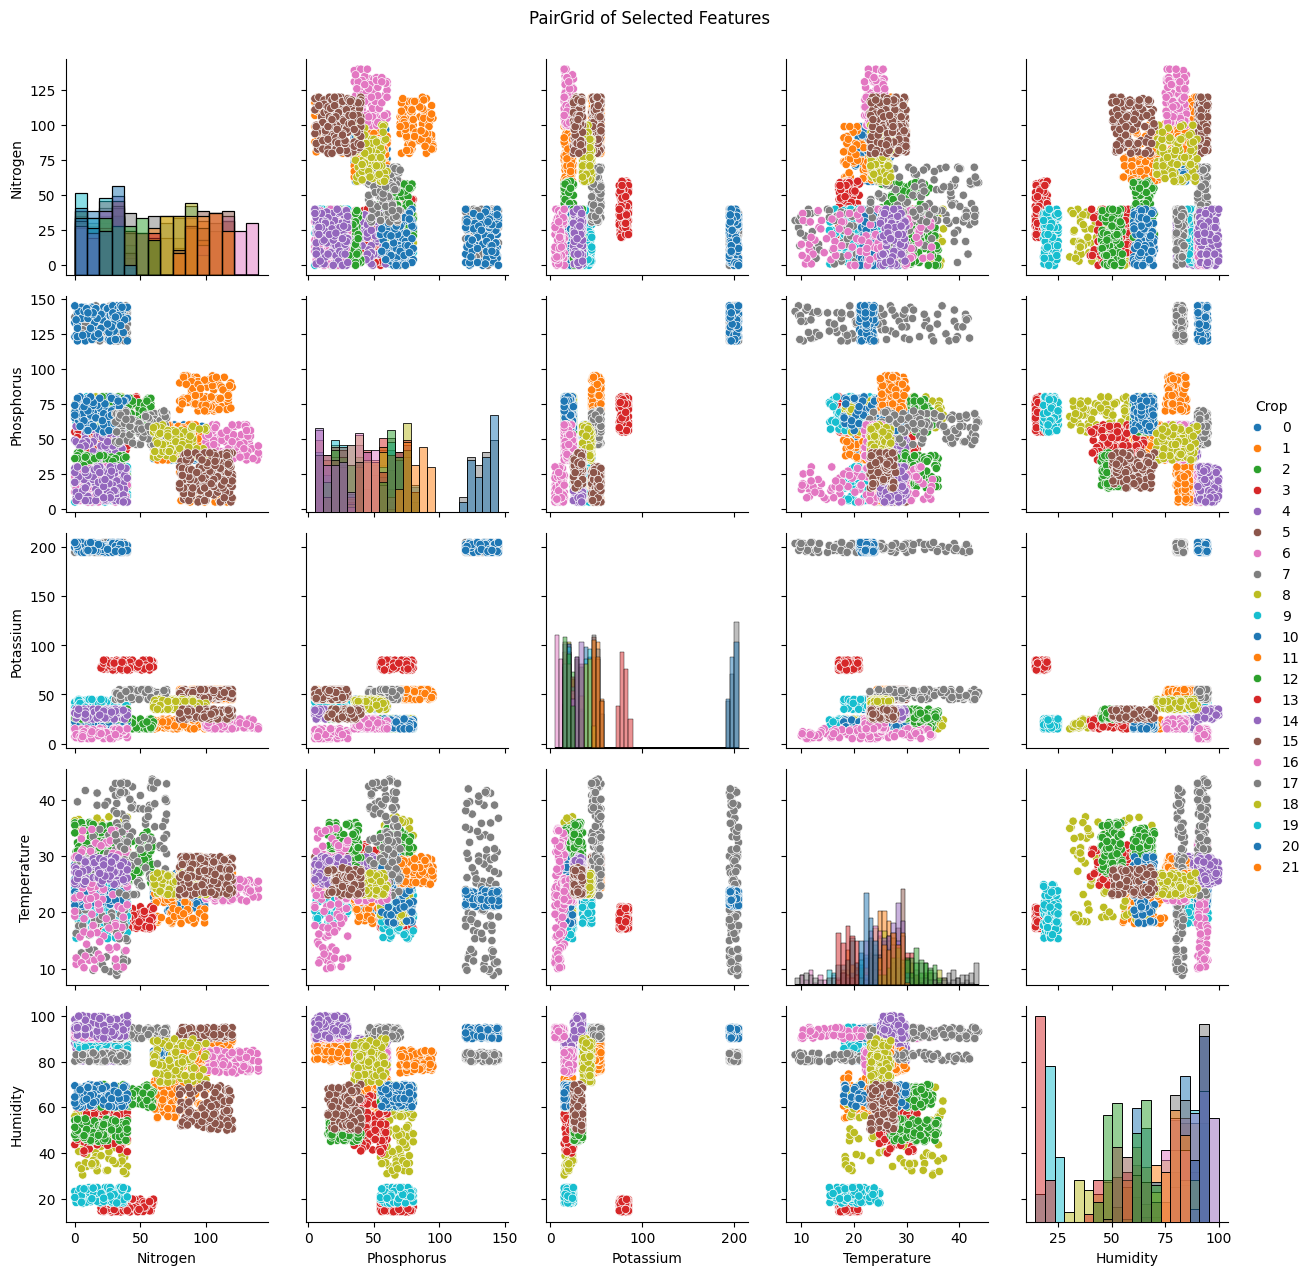

In [39]:
# PairGrid of Selected Features

selected_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity']
pairgrid = sns.PairGrid(crop_data, vars=selected_features, hue='Crop', palette='tab10')
pairgrid.map_diag(sns.histplot)
pairgrid.map_offdiag(sns.scatterplot)
pairgrid.add_legend()
plt.suptitle('PairGrid of Selected Features', y=1.02)
plt.show()

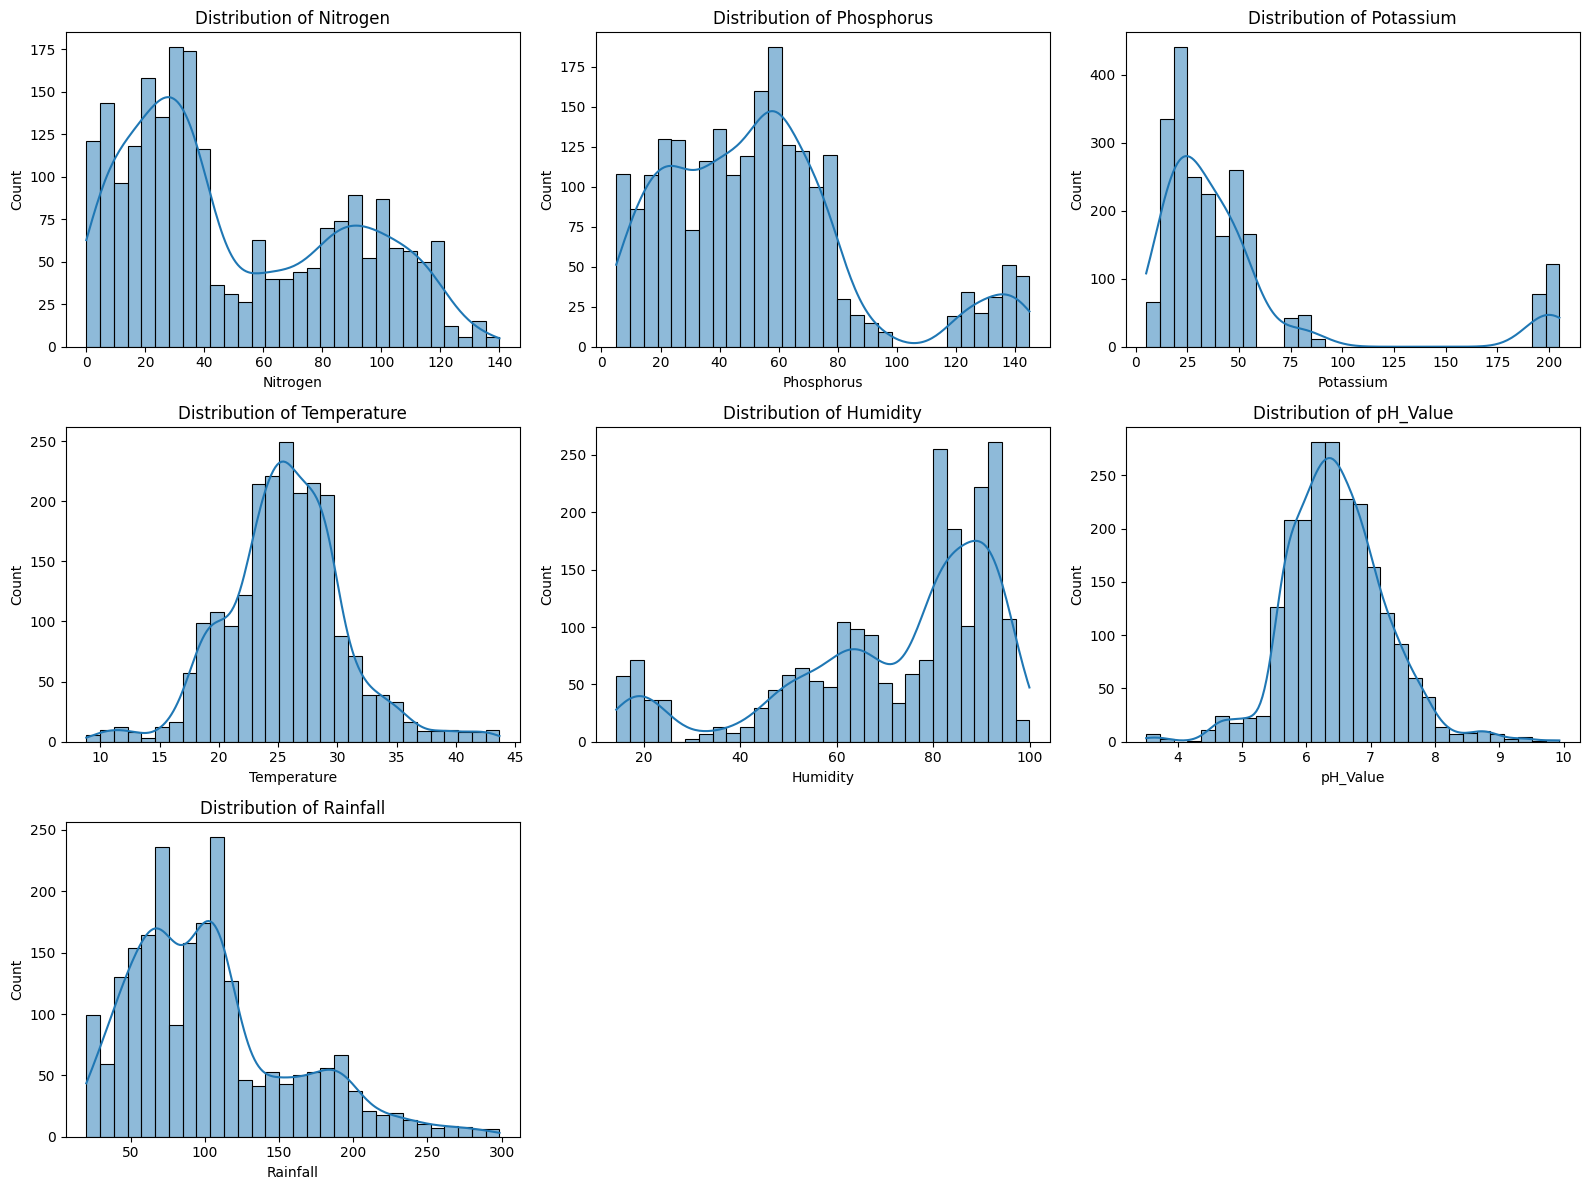

In [35]:
# Distribution of Features

features = crop_data.columns[:-1]
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(crop_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

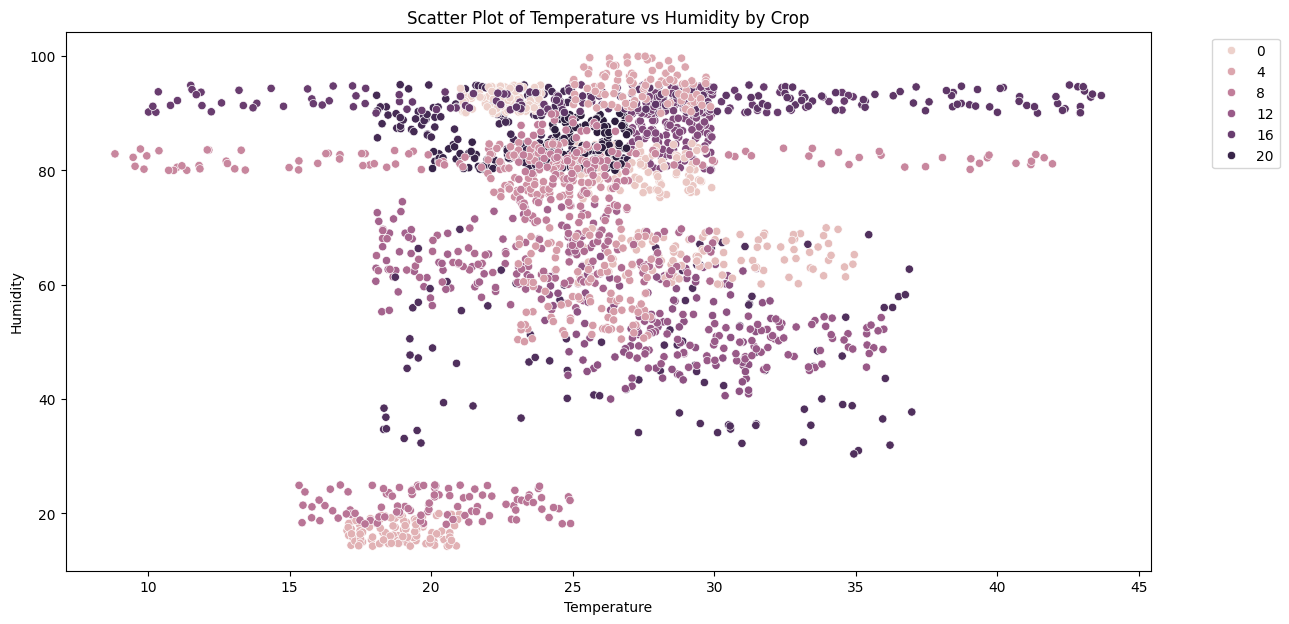

In [38]:
# Scatter Plot of Temperature vs Humidity

plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature', y='Humidity', hue='Crop', data=crop_data)
plt.title('Scatter Plot of Temperature vs Humidity by Crop')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [12]:
# Encode the target variable

label_encoder = LabelEncoder()
crop_data['Crop'] = label_encoder.fit_transform(crop_data['Crop'])

In [14]:
# Split the data into features and target variable

X = crop_data.drop(columns=['Crop'])
y = crop_data['Crop']

In [15]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train the RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on the test set

y_pred = rf_classifier.predict(X_test)

In [22]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
target_names = [str(label) for label in label_encoder.classes_]
report = classification_report(y_test, y_pred, target_names=target_names)

In [23]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

Accuracy: 99.32%
Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]

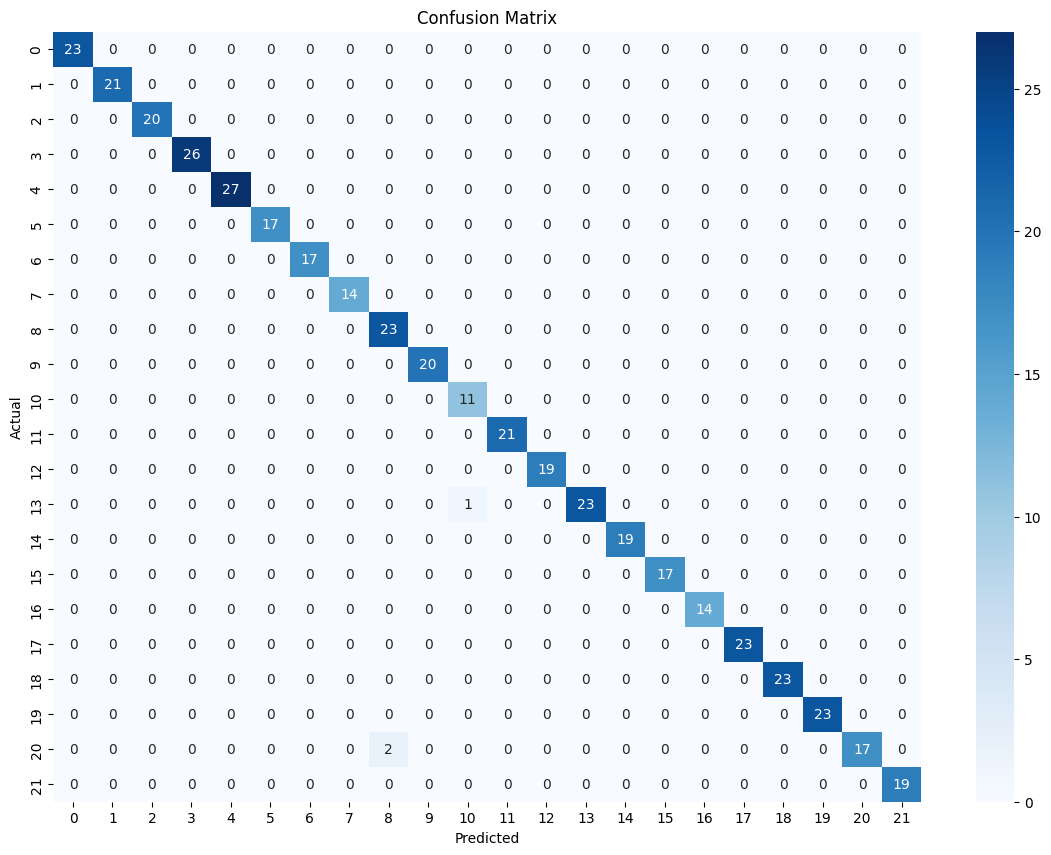

In [27]:
# Plot the confusion matrix

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()